## [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

- Logistic regression is an algorithm for **classification**.

- Logistic regression builds a **linear model** that separates the two classes by a hyperplane.

<img src="../_img/linear_classifier.jpg" width="300" align="left">

For simplicity, let' discuss first the **univariate** case, with a **binary target** variable and **no bias** term.

<img src="../_img/logreg_1d.jpg" width="400" align="left">

### The Programming Exam Problem

In [6]:
import pandas as pd
data = [
    {'name': 'David Beckham',    'study_time': 0,   'result': 0},
    {'name': 'Jessica Scott',    'study_time': 7,   'result': 1},
    {'name': 'Jack Johnson',     'study_time': 3.5, 'result': 0},
    {'name': 'Scunner Campbell', 'study_time': 6,   'result': 0},
    {'name': 'Plain Jane ',      'study_time': 3,   'result': 1},
    {'name': 'Archie Gillis',    'study_time': 15,  'result': 1},
]
df = pd.DataFrame(data)
df

,name,study_time,result
0,David Beckham,0.0,0
1,Jessica Scott,7.0,1
2,Jack Johnson,3.5,0
3,Scunner Campbell,6.0,0
4,Plain Jane,3.0,1
5,Archie Gillis,15.0,1


The above toy data set contains 2 attributes of 6 students:
- Hours spent on preparing for the exam.
- Did the student pass the exam? (0=no, 1=yes)

**Exercise 1**: Train a univariate logistic regression model that estimates the `result` column from the `study_time` column!

In [18]:
# Extract input & target.
x = df['study_time'].values # input
y = df['result'].values     # target

In [20]:
# Define sigmoid function.
import numpy as np
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [21]:
sigmoid(0)

0.5

In [23]:
sigmoid(np.array([1, 2, 3]))

array([0.73105858, 0.88079708, 0.95257413])

In [24]:
def ce(y, yhat):
    return (-y * np.log(yhat) - (1 - y) * np.log(1 - yhat)).sum()

In [43]:
w = 0 # initial model parameter

for k in range(10):
    yhat = sigmoid(x * w)
    ce = (-y * np.log(yhat) - (1 - y) * np.log(1 - yhat)).sum()
    ce_i = (yhat - y) @ x
    ce_ii = (yhat * (1 - yhat)) @ x**2
    print(f"ce(w)={ce:.6f}  ce'(w)={ce_i:.6f}  w={w}")
    w = w - ce_i / ce_ii # Newton-step

ce(w)=4.158883  ce'(w)=-7.750000  w=0
ce(w)=3.776799  ce'(w)=-0.787094  w=0.09358490566037736
ce(w)=3.771515  ce'(w)=-0.031070  w=0.10666796800443652
ce(w)=3.771506  ce'(w)=-0.000056  w=0.1072285464056069
ce(w)=3.771506  ce'(w)=-0.000000  w=0.10722956451957244
ce(w)=3.771506  ce'(w)=-0.000000  w=0.10722956452292766
ce(w)=3.771506  ce'(w)=0.000000  w=0.1072295645229277
ce(w)=3.771506  ce'(w)=0.000000  w=0.10722956452292769
ce(w)=3.771506  ce'(w)=0.000000  w=0.10722956452292769
ce(w)=3.771506  ce'(w)=0.000000  w=0.10722956452292769


Text(0, 0.5, 'P(pass the exam)')

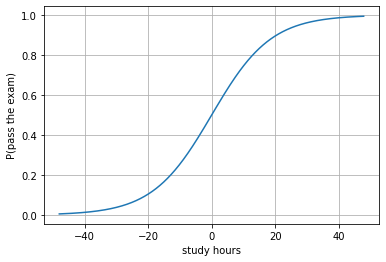

In [53]:
# Display the probability of passing the exam (according to the model)
# as a function of the study hours!
import matplotlib.pyplot as plt
x2 = np.arange(-48, 48, 0.1) # study time
yhat2 = sigmoid(x2 * w)    # predicted probability of passing the exam
plt.plot(x2, yhat2)
plt.grid(True)
plt.xlabel('study hours')
plt.ylabel('P(pass the exam)')

### The Wisconsin Breast Cancer Problem

<img src="../_img/wisconsin_illustration.jpg" width="200" align="left">

The Wisconsin Breast Cancer data set contains the attributes of 699 suspicious lesions in tissue microscopy images. The raw data is contained in [wisconsin_data.txt](../_data/wisconsin_data.txt), the description can be read in [wisconsin_names.txt](../_data/wisconsin_names.txt). The task is to estimate if the lesion is malicious (4) or benign (2), based on the image attributes of the lesion. Therefore the task is a binary classification problem.

**Exercise 2**: Train a univariate logistic regression model for each input feature separately, and measure the *average* cross-entropy of each model! Use the full data set both for training and evaluation!

In [4]:
import pandas as pd

In [5]:
# Column names.
names = [
    'Sample_code_number',
    'Clump_Thickness',
    'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape',
    'Marginal_Adhesion',
    'Single_Epithelial_Cell_Size',
    'Bare_Nuclei',
    'Bland_Chromatin',
    'Normal_Nucleoli',
    'Mitoses',
    'Class'
]

In [11]:
# Load data to DataFrame.
df = pd.read_csv('../_data/wisconsin_data.txt', sep=',', names=names, na_values='?')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_Thickness              699 non-null    int64  
 2   Uniformity_of_Cell_Size      699 non-null    int64  
 3   Uniformity_of_Cell_Shape     699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample_code_number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [14]:
# Handle null values.
se = df['Bare_Nuclei']
se.fillna(se.mean(), inplace=True)

In [86]:
def avg_cross_entropy(y, yhat):
    return (-y * np.log(yhat) - (1 - y) * np.log(1 - yhat)).mean()

def train_logreg(x, y):
    w = 0 # initial model parameter
    for k in range(10):
        yhat = sigmoid(x * w)
        ce_i = (yhat - y) @ x
        ce_ii = (yhat * (1 - yhat)) @ x**2
        w = w - ce_i / ce_ii # Newton-step
    return w

In [92]:
y = df['Class'].values // 2 - 1 # target vector
for name in names[1:-1]:
    x = df[name].values    # input vector
    w = train_logreg(x, y) # train model
    yhat = sigmoid(x * w)  # make prediction
    ace = avg_cross_entropy(y, yhat)
    print(f'{name:30} {ace} {w}')

Clump_Thickness                0.6877388587845084 0.03995610011874475
Uniformity_of_Cell_Size        0.6383720214989874 0.16899601558126182
Uniformity_of_Cell_Shape       0.6451413035345479 0.15502997222673773
Marginal_Adhesion              0.6590996892553264 0.14093730167294283
Single_Epithelial_Cell_Size    0.6868149890759724 0.0582681374215134
Bare_Nuclei                    0.6329906292130498 0.15362976756622004
Bland_Chromatin                0.6797548410004657 0.07917958833296734
Normal_Nucleoli                0.6512356138866332 0.15213614235880277
Mitoses                        0.6895896950808426 0.07347703509166521


**Exercise 3**: Repeat the previous experiment using scikit-learn!

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss # (log_loss = avg_cross_entropy)

cl = LogisticRegression(fit_intercept=False, C=np.inf)

y = df['Class'].values // 2 - 1      # target vector
for name in names[1:-1]:
    X = df[[name]].values            # input matrix
    cl.fit(X, y)                     # train model
    yhat = cl.predict_proba(X)[:, 1] # make prediction
    ace = log_loss(y, yhat)
    print(f'{name:30} {ace} {cl.coef_[0][0]}')

Clump_Thickness                0.6877388587845084 0.03995610035279255
Uniformity_of_Cell_Size        0.6383720214989874 0.16899601549534596
Uniformity_of_Cell_Shape       0.6451413035345482 0.1550299722202851
Marginal_Adhesion              0.6590996892553296 0.1409373491601551
Single_Epithelial_Cell_Size    0.6868149890759724 0.05826813846763737
Bare_Nuclei                    0.6329906292130497 0.15362976541621529
Bland_Chromatin                0.6797548410004665 0.0791796082061368
Normal_Nucleoli                0.6512356138866334 0.15213614230482528
Mitoses                        0.6895896950808427 0.07347705088647388


In [102]:
# take the Bare_Nuclei => Class model
X = df[['Bare_Nuclei']].values
cl.fit(X, y)

LogisticRegression(C=inf, fit_intercept=False)

In [108]:
# What is the probability of maliciousness if Bare_Nuclei=10?
cl.predict_proba([[10]])[0][1]

0.8229258683826854

### Multivariate Logistic Regression

The previous approach can be generalized to allows multiple input features.

- model's prediction: $\hat{y} = \sigma(Xw)$<br>
- objective function: $CE(w) = -\log(\hat{y})^Ty - \log(1 - \hat{y})^T(1 - y)$<br>
- gradient vector: $\frac{d}{dw} CE(w) = X^T(\hat{y} - y)$<br>
- Hessian matrix: $\left(\frac{d}{dw}\right)^2 CE(w) = X^T \mathrm{diag}\left(\hat{y}(1 - \hat{y})\right) X$
- Newton-step: $w_{\mathrm{new}} = w - \left[\left(\frac{d}{dw}\right)^2 CE(w)\right]^{-1} \left[\frac{d}{dw} CE(w)\right]$

Similarly to linear regression, the bias term can be handled by introducing a constant 1 feature.
<br><br>

**Exercise 4**: Train a multivariate logistic regression model and measure its *average* cross-entropy! Use the full data set both for training and evaluation! Implement the training algorithm without using scikit-learn!

**Exercise 5**: Repeat the previous experiment using scikit-learn!

**Exercise 6**: Train the model on a randomly selected 70% of the data and evaluate it on the remaining 30%!


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np

X = df[names[1:-1]].values       # input matrix
y = df['Class'].values // 2 -1   # target vector

# train-test split
train_set, test_set = train_test_split(np.arange(len(y)), train_size=0.7, random_state=42)

# train model on the training set
cl = LogisticRegression(fit_intercept=False, C=np.inf, max_iter=10, solver='newton-cholesky')
cl.fit(X[train_set], y[train_set])

# make prediction on the whole data set
yhat = cl.predict_proba(X[test_set])[:, 1]

# measure average cross entropy on test set
log_loss(y[test_set], yhat[test_set])

IndexError: index 499 is out of bounds for axis 0 with size 210

In [38]:
# measure average cross-entropy on training set
log_loss[y[train_set], yhat[train_set]]

NameError: name 'yhat' is not defined

In [44]:
# classification accuracy on test set
((yhat[test_set] > 0.5) == y[test_set]).mean()

NameError: name 'yhat' is not defined

In [45]:
# distribution of labels in the data set
df.groupby('Class').size() / len(df)

Class
2    0.655222
4    0.344778
dtype: float64

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y[test_set], yhat[test_set])

NameError: name 'yhat' is not defined

### $K$-Fold Cross-Validation
- Idea: Randomly split the data to $K$ roughly equal partitions and run $K$ experiments!
- In the $i$-th experiment, partition $i$ is used as the test set and all other partitions as the training set.
- In the end, the scores obtained from the $K$ experiments are averaged.
- $K$-fold cross-validation is slower but more reliable than the simple train-test split.
- In the *stratified* variant of the method, the same distribution of labels is enforced in every partition.

<img src="../_img/cross_val.jpg" width="350" align="left" style="opacity: 0.8">

**Exercise 8**: Replace the train-test split to 10-fold cross valiadtion!

In [62]:
from sklearn.model_selection import KFold

cl = LogisticRegression(fit_intercept=False, C=np.inf, max_iter=10, solver='newton-cholesky')
cross_validation = KFold(10, shuffle=True, random_state=42)

scores = []
for train_set, test_set in cross_validation.split(X):
    cl.fit(X[train_set], y[train_set])
    yhat = cl.predict(X)
    scores.append(accuracy_score(y[test_set], yhat[test_set]))
    
scores

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values